# SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#pip install sklearn

In [3]:
from sklearn import datasets

In [4]:
data = datasets.load_breast_cancer()
type(data)

sklearn.utils._bunch.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
len(data['feature_names'])

30

In [8]:
df_X = pd.DataFrame(data.data, columns=data.feature_names)

In [9]:
df_X.shape

(569, 30)

In [10]:
df_y = pd.DataFrame(data.target, columns=['target'])

In [11]:
df_y.shape

(569, 1)

In [12]:
df_X.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [13]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [14]:
df_y.value_counts()

target
1         357
0         212
dtype: int64

## Training data, Testing data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, shuffle=True, random_state=2022, stratify=df_y)

In [17]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

## 표준화

In [18]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
193,12.340,26.86,81.15,477.4,0.10340,0.13530,0.10850,0.04562,0.1943,0.06937,...,15.65,39.34,101.70,768.9,0.17850,0.4706,0.4425,0.14590,0.3215,0.12050
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.1678,0.1397,0.05087,0.3282,0.08490
41,10.950,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,0.06870,...,12.84,35.34,87.22,514.0,0.19090,0.2698,0.4023,0.14240,0.2964,0.09606
344,11.710,15.45,75.03,420.3,0.11500,0.07281,0.04006,0.03250,0.2009,0.06506,...,13.06,18.16,84.16,516.4,0.14600,0.1115,0.1087,0.07864,0.2765,0.07806
536,14.270,22.55,93.77,629.8,0.10380,0.11540,0.14630,0.06139,0.1926,0.05982,...,15.29,34.27,104.30,728.3,0.13800,0.2733,0.4234,0.13620,0.2698,0.08351


In [19]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
y_train = y_train.values.reshape(-1)

In [20]:
X_train

array([[-0.50762849,  1.80800464, -0.44717317, ...,  0.48265285,
         0.49319384,  2.0572006 ],
       [-1.39005741, -1.26680666, -1.33696241, ..., -0.95522415,
         0.59950095,  0.07506492],
       [-0.89492757,  0.5047577 , -0.8221413 , ...,  0.42969516,
         0.09493886,  0.69643105],
       ...,
       [ 0.11650816,  0.54733201,  0.21196001, ...,  2.36189438,
         2.15761408,  2.44694638],
       [-1.02588482,  0.15233702, -1.03212345, ..., -0.70571776,
        -0.03358168, -0.33806561],
       [-0.11475676,  1.07714565, -0.14760403, ..., -0.80104161,
        -0.38264979, -1.13259023]])

In [21]:
y_train.shape

(455,)

## Learning

In [22]:
from sklearn import svm

In [23]:
clf = svm.SVC(kernel='linear')

In [24]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

## Test

In [25]:
X_test = ss.transform(X_test)
y_test = y_test.values.reshape(-1)

In [26]:
y_pred = clf.predict(X_test)

## Accuracy

In [27]:
(y_test == y_pred).sum() / y_test.shape[0]

0.9912280701754386

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test, y_pred)

0.9912280701754386

## Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [38]:
cfm = confusion_matrix(y_test, y_pred)

In [39]:
label = [0, 1]

In [40]:
X_test.shape

(114, 30)

C:\Users\USER\anaconda3\envs\myml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


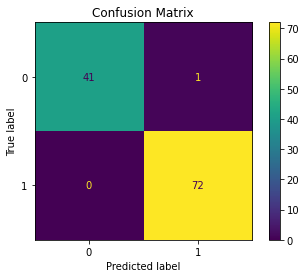

In [41]:
plot = plot_confusion_matrix(clf, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None

plot.ax_.set_title('Confusion Matrix')

plt.show()

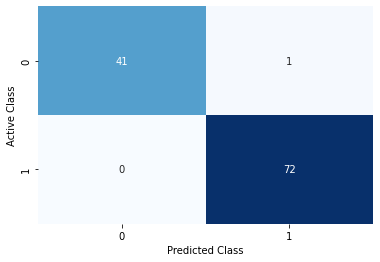

In [42]:
plt.figure(figsize=(6, 4))
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='Blues')
plt.ylabel("Active Class")
plt.xlabel("Predicted Class")
plt.show()

## RBF

In [ ]:
clf = svm.SVC(kernel='rbf', C=1.0, gamma='scale')

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

## Hyper-Parameter Tunning (GridSearch)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param = {
    'C' : range(1, 100),
    'gamma' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0],
    'kernel' : ['rbf']
}

In [ ]:
model = svm.SVC()
grid = GridSearchCV(model, param, refit=True)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
best_clf = grid.best_estimator_

In [ ]:
grid.best_score_

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
param = {
    'C' : uniform(),
    'gamma' : uniform(),
    'kernel' : ['rbf']
}

In [ ]:
model = svm.SVC()
rs = RandomizedSearchCV(model, param, refit=True)

In [ ]:
rs.fit(X_train, y_train)

In [ ]:
rs.best_params_

In [ ]:
rs.best_score_

In [ ]:
y_pred = rs.best_estimator_.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)